#1

In [33]:
import pandas as pd;
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# load the data
df = pd.read_csv('housing.csv')
#display row in data set
print(df.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [34]:
# summary statics
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

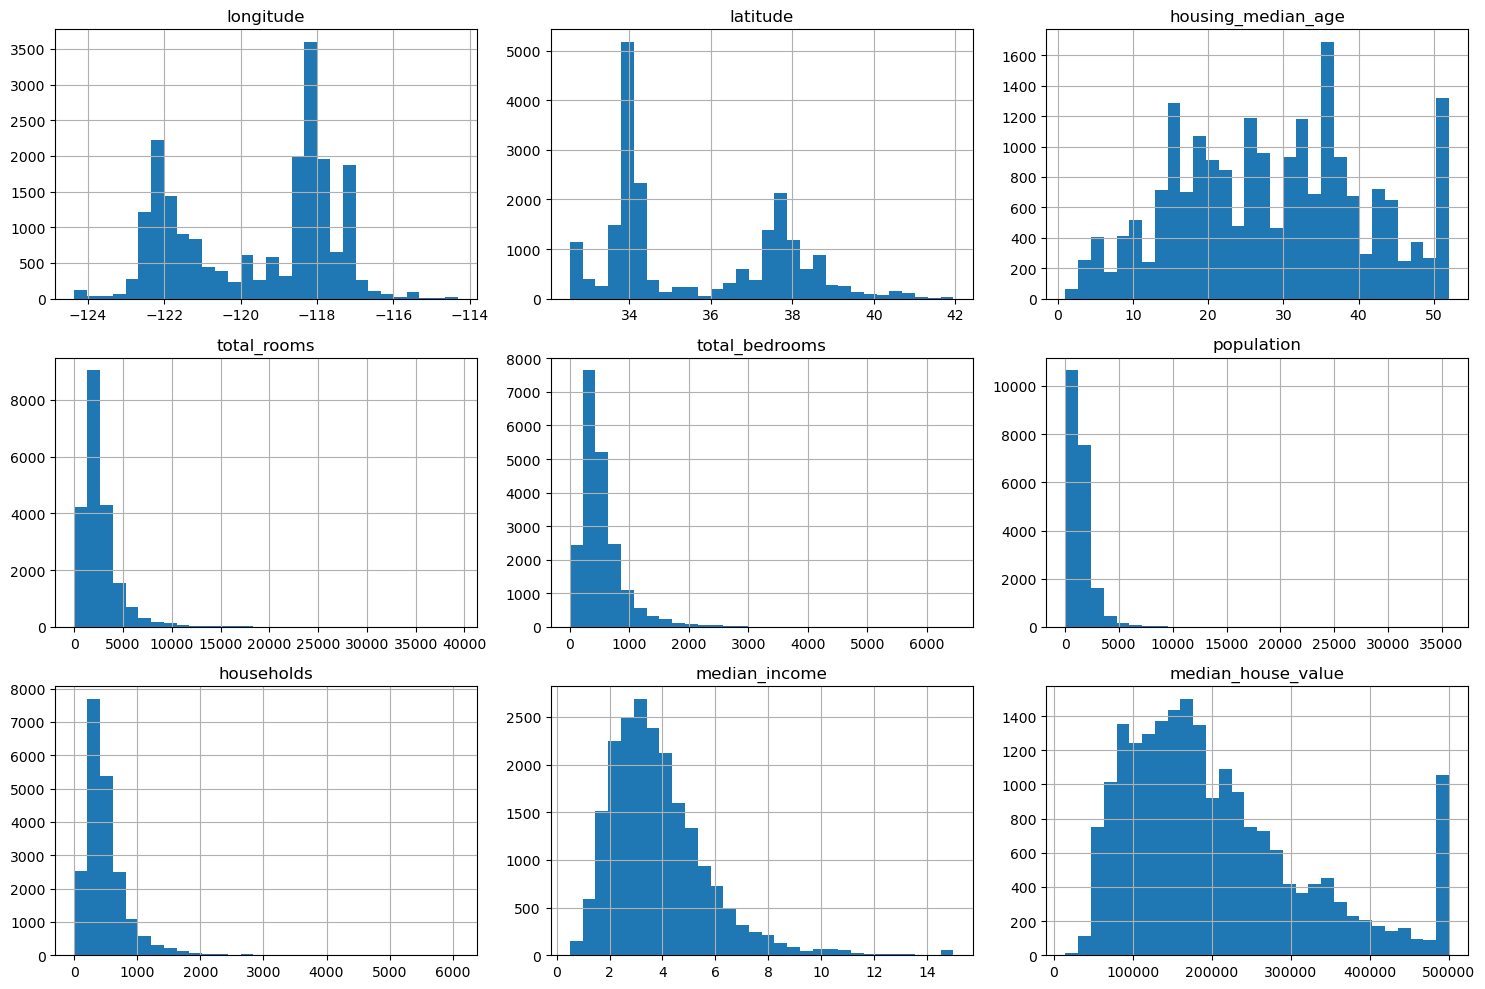

In [35]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15,10), layout=(3,3))
plt.tight_layout()
plt.show()

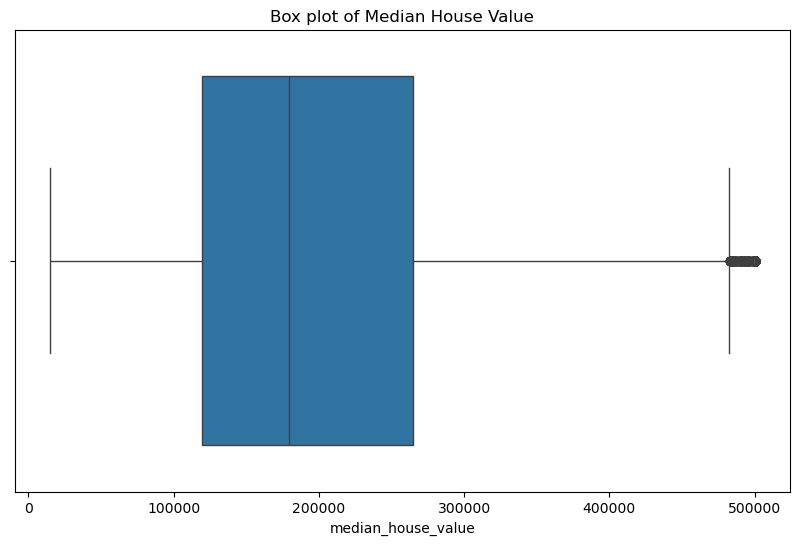

In [36]:
import seaborn as sns

# Box plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='median_house_value', data=df)
plt.title('Box plot of Median House Value')
plt.show()


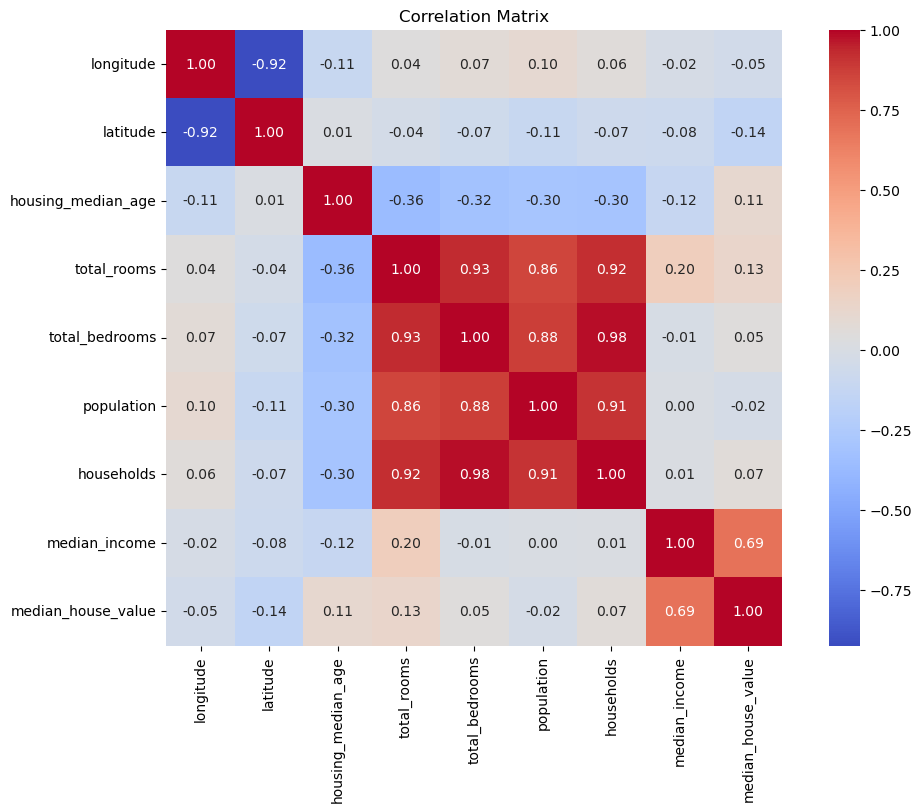

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculating the correlation
correlation_matrix = df_numeric.corr()

# Heatmap correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [38]:
print("\nMissing value in Each Column:")
print(df.isnull().sum())


Missing value in Each Column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [39]:
#drop missing values
df_dropped_any = df.dropna()
print("\n DatatFrame after dropped after any missing values")
#Displaying droppped values
print(df_dropped_any.head())


 DatatFrame after dropped after any missing values
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [40]:
#missing values
df.to_csv('modified_housing.csv', index=False)
#create valuecategory
df['ValueCategory'] = df['median_house_value'].apply(lambda x: 'High Value' if x > 300000 else 'Low Value')
# verify feature
print(df[['median_house_value', 'ValueCategory']].head())



   median_house_value ValueCategory
0            452600.0    High Value
1            358500.0    High Value
2            352100.0    High Value
3            341300.0    High Value
4            342200.0    High Value


In [41]:
#Apply one hot encoding
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
#disply encoding
print(df_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ValueCategory  \
0       322.0       126.0         8.3252            452600.0    High Value   
1      2401.0      1138.0         8.3014            358500.0    High Value   
2       496.0       177.0         7.2574            352100.0    High Value   
3       558.0       219.0         5.6431            341300.0    High Value   
4       565.0       259.0         3.8462            342200.0    High Value   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0

In [42]:
# normalization (min-max scaling)
min_max_scaler = MinMaxScaler()
#numerical feature you want to scale
numerical_features = ['median_income', 'median_house_value', 'total_rooms', 'total_bedrooms']
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])
#display the transformation
print(df[numerical_features].head())

   median_income  median_house_value  total_rooms  total_bedrooms
0       0.539668            0.902266     0.022331        0.019863
1       0.538027            0.708247     0.180503        0.171477
2       0.466028            0.695051     0.037260        0.029330
3       0.354699            0.672783     0.032352        0.036313
4       0.230776            0.674638     0.041330        0.043296
